# UFO predictions in the US

Dit Jupyter Notebook gaat ons vertellen over feiten en visualiseren van de UFO bezichtigingen en het 
inschatten van de volgende UFO bezichtiging. Een voorbeeld van zo'n visualisatie, zal als volgt eruit zien:

##### Geslacht ratio in Amerika:

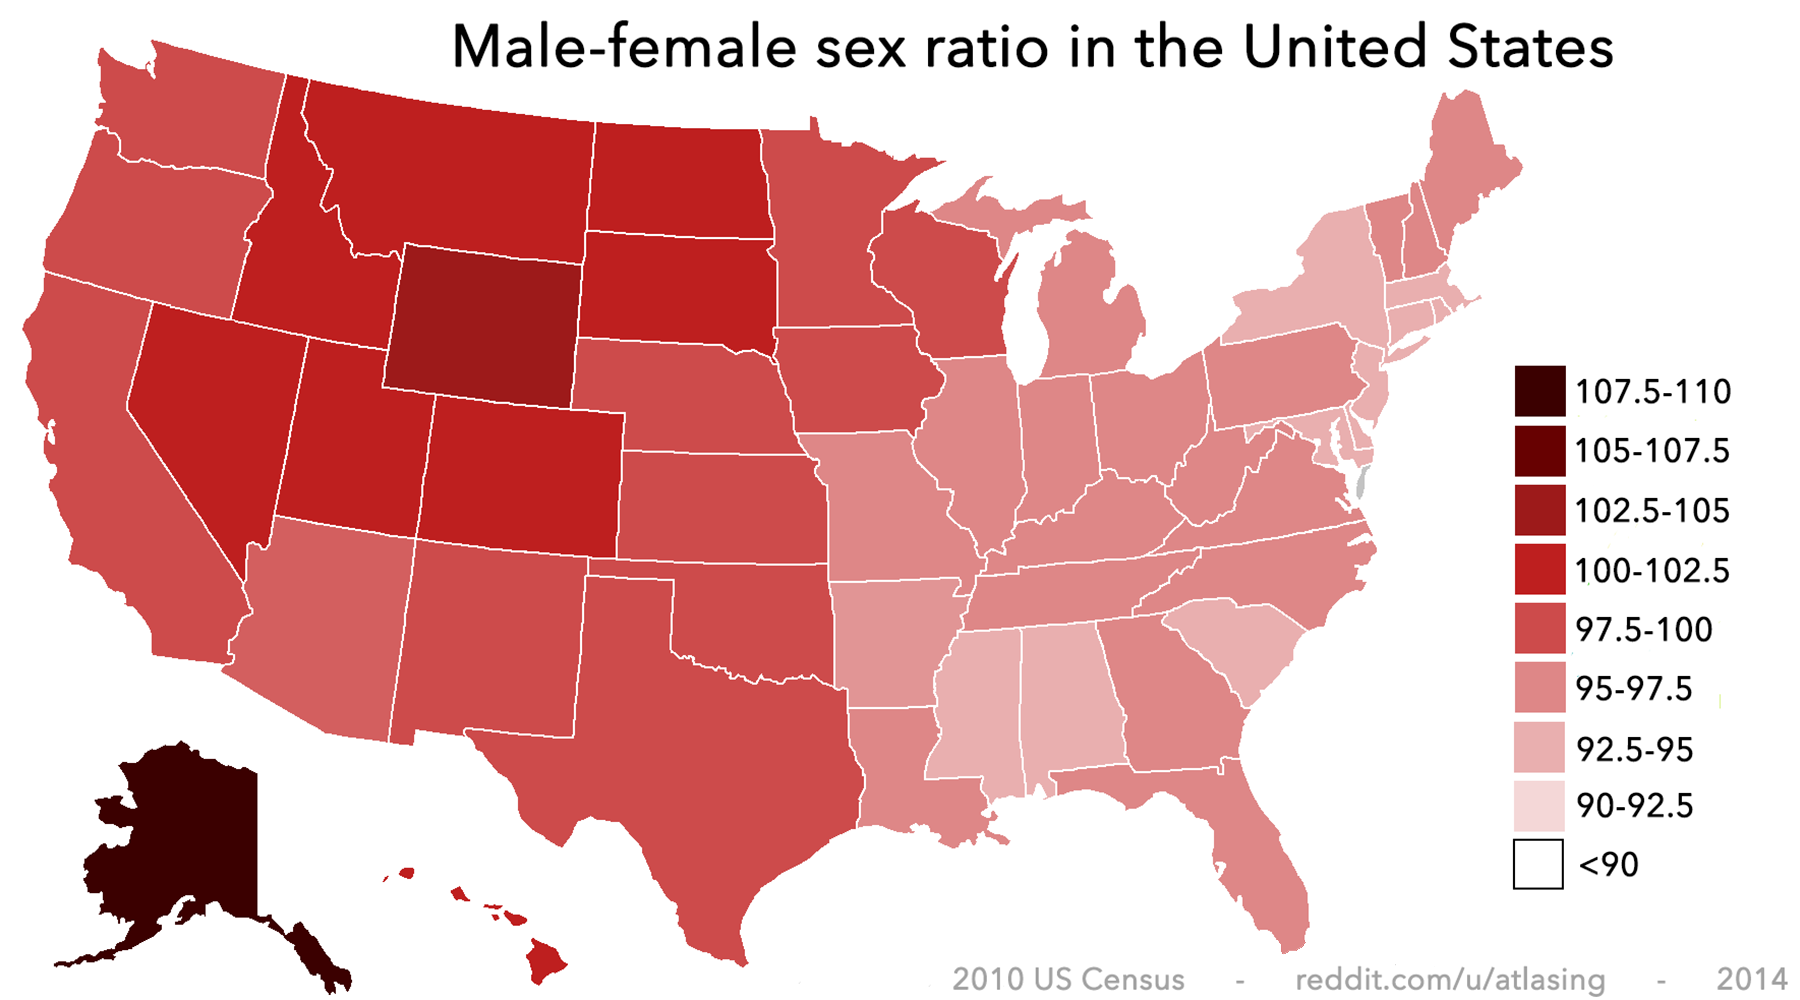

In [310]:
from IPython.display import Image
Image(filename='example_ratio.png') #bron: https://www.reddit.com/r/MapPorn/comments/21evhb/malefemale_sex_ratios_across_the_united_states/

### Table of contents: 
- Data Preparations
    * [Import Libraries](#import)
    * [Pandas Settings](#setting)
    * [UfoData Reading](#read)
- Data Usage
    * [Default Ufo Table](#def)
    * [Research Coordinates Ufo Table](#res_coord)
    * [Default Research Ufo Table](#res_def)
    * [Default Externe Dataset](#def_ext)
- Simplify Data
    * [Deleting duplicate data](#dup_delete)
- Visualisation   
    * [State Sightings](#state_sight)
    * [World Sightings](#world_sight)
- [Vragen](#vragen)

#### Import Libraries: <a class="anchor" id="import"></a>

In [311]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [312]:
states = geopandas.read_file('data/usa-states-census-2014.shp')


#### Pandas Settings <a class="anchor" id="setting"></a>

In [313]:
pd.set_option('display.max_colwidth',None)
pd.set_option('max_rows', 100)

#### Ufodata reading: <a class="anchor" id="read"></a>

In [314]:
read = pd.read_csv('ufo.csv', low_memory= False)
ufodata = pd.DataFrame(read) #Guy's benaming
ufo_data = pd.DataFrame(read) #Ruben's benaming
ufo_data = ufo_data.dropna()

#####  Default Ufo table: <a class="anchor" id="def"></a>

In [315]:
indexNames = ufo_data[ ufo_data['shape'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown shapes
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_ufo_information = ufo_data[['shape', 'city', 'country', 'datetime', 'comments']]
default_ufo_information.head() #get only shape, city, country, datetime and comments

,shape,city,country,datetime,comments
0,cylinder,san marcos,us,10/10/1949 20:30,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit
3,circle,edna,us,10/10/1956 21:00,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home
4,light,kaneohe,us,10/10/1960 20:00,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan
5,sphere,bristol,us,10/10/1961 19:00,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi
7,disk,norwalk,us,10/10/1965 23:45,A bright orange color changing to reddish color disk/saucer was observed hovering above power transmission lines.


#####  Research Coordinates Ufo Table <a class="anchor" id="res_coord"></a>

In [322]:
# Get research Coordinates Ufo table
indexNames = ufo_data[ ufo_data['latitude'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown latitude
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_coordinates_information = ufo_data[['latitude', 'longitude']]
default_coordinates_information #get only shape, city, country, datetime and comments

,latitude,longitude
0,29.8830556,-97.941111
3,28.9783333,-96.645833
4,21.4180556,-157.803611
5,36.5950000,-82.188889
7,41.1175000,-73.408333
...,...,...
88674,38.2972222,-122.284444
88675,38.9011111,-77.265556
88676,35.6527778,-97.477778
88677,34.3769444,-82.695833


#####  Default Research Ufo table: <a class="anchor" id="res_def"></a>

In [317]:
# Get research Ufo table
indexNames = ufo_data[ ufo_data['shape'] == 'unknown' ].index
ufo_data.drop(indexNames , inplace=True) #delete unknown shapes
#------------
pd.set_option('display.max_colwidth', None) #increase comment column size
# -----------
default_ufo_information = ufo_data[['shape', 'latitude', 'longitude', 'datetime', 'duration (seconds)', 'duration (hours/min)']]
default_ufo_information.head() #get only shape, city, country, datetime and comments

,shape,latitude,longitude,datetime,duration (seconds),duration (hours/min)
0,cylinder,29.8830556,-97.941111,10/10/1949 20:30,2700,45 minutes
3,circle,28.9783333,-96.645833,10/10/1956 21:00,20,1/2 hour
4,light,21.4180556,-157.803611,10/10/1960 20:00,900,15 minutes
5,sphere,36.5950000,-82.188889,10/10/1961 19:00,300,5 minutes
7,disk,41.1175000,-73.408333,10/10/1965 23:45,1200,20 minutes


#####  Default Externe Dataset<a class="anchor" id="def_ext"></a>

In [318]:
read = pd.read_csv('nuforc_reports.csv')
ufodata2 = pd.DataFrame(read)
ufodata2 = ufodata2[['city', 'state', 'date_time', 'shape', 'duration']]
ufodata2 = ufodata2.dropna()
#----------
# for ind in ufodata2.index: 
#      print(ufodata2['duration'][ind])  
ufodata2

,city,state,date_time,shape,duration
0,Chester,VA,2019-12-12T18:43:00,light,5 seconds
1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds
3,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds
4,Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes
5,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes
...,...,...,...,...,...
88120,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes
88121,Bolivar,MO,2019-10-02T20:00:00,light,20 seconds
88122,North Port,FL,2019-10-02T20:03:00,formation,20 seconds
88123,Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes


#####  Deleting duplicate data <a class="anchor" id="dup_delete"></a>

In [319]:
firstdataset = ufodata
firstdataset = firstdataset.dropna()
#makes the firstdataset comparable with extern dataset:
firstdataset['state'] = firstdataset['state'].str.upper() 
firstdataset['city'] = firstdataset['city'].str.title() 
firstdataset = firstdataset.rename(columns={"datetime": "date_time"})

s=pd.concat([ufodata2, firstdataset],keys=[1,2]).drop_duplicates(['date_time', 'city'],keep='first') #delete duplicates
noclonedatasetextern =s.loc[1].dropna(axis=1)
noclonedatasetextern

d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\users\ruben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,city,state,date_time,shape,duration
0,Chester,VA,2019-12-12T18:43:00,light,5 seconds
1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds
3,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds
4,Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes
5,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes
...,...,...,...,...,...
88120,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes
88121,Bolivar,MO,2019-10-02T20:00:00,light,20 seconds
88122,North Port,FL,2019-10-02T20:03:00,formation,20 seconds
88123,Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes


#####  State Sight Countings <a class="anchor" id="state_sight"></a>

   STUSPS  sightings
0      CA      17951
1      FL       8849
2      WA       7416
3      TX       6790
4      NY       6260
5      PA       5306
6      AZ       5172
7      IL       4871
8      OH       4860
9      NC       4107
10     MI       3951
11     OR       3609
12     CO       3211
13     MO       3085
14     GA       2933
15     NJ       2925
16     VA       2915
17     MA       2880
18     ON       2708
19     IN       2693
20     WI       2660
21     SC       2518
22     TN       2478
23     MN       2281
24     CT       2088
25     MD       1972
26     KY       1849
27     NV       1724
28     NM       1670
29     OK       1567
30     UT       1498
31     AL       1473
32     IA       1416
33     ID       1280
34     KS       1272
35     ME       1242
36     LA       1223
37     AR       1211
38     NH       1178
39     BC       1162
40     MT       1072
41     WV        989
42     MS        821
43     NE        792
44     AK        704
45     HI        670
46     AB    

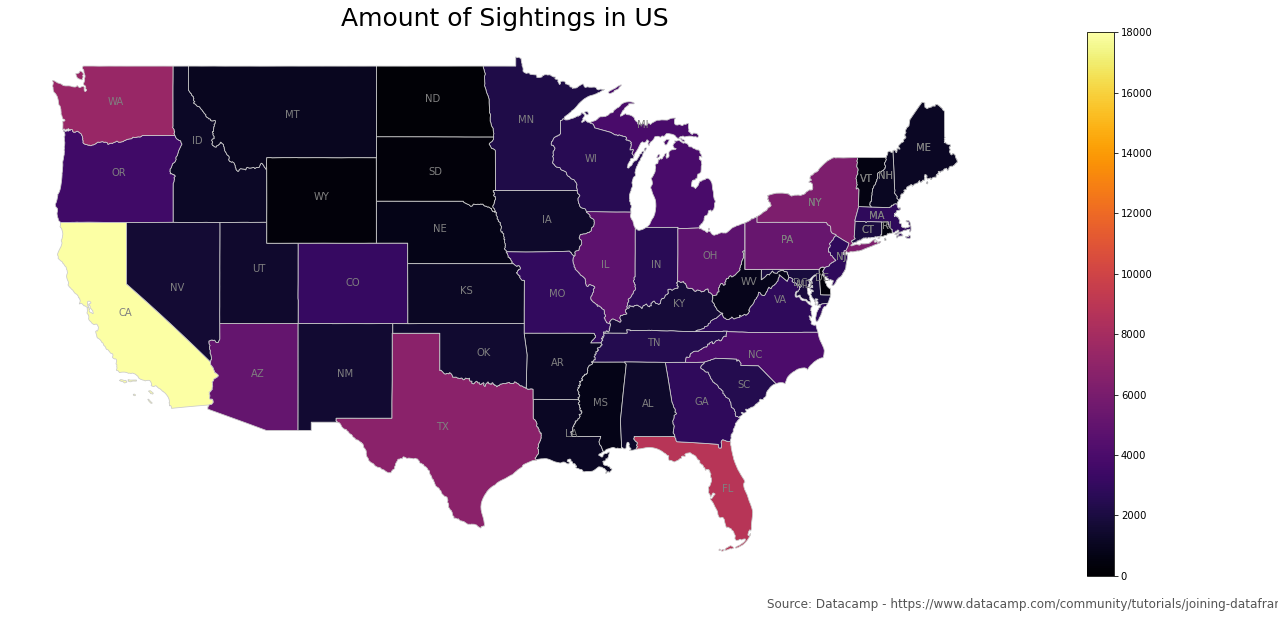

In [320]:
#makes both datasets have equal appellation and concatenate them and gives it the right appellation as well
onlystateextern = noclonedatasetextern[['state']]
onlystatefirst = firstdataset[['state']]
onlystatetotal = pd.concat([onlystateextern, onlystatefirst])
countings = onlystatetotal['state'].value_counts()
countings = pd.DataFrame(countings)

countings = countings.reset_index() #thanks Mark
countings = countings.rename(columns={'index': 'STUSPS', 'state': 'sightings'})
print(countings)
states = geopandas.read_file('data/usa-states-census-2014.shp')
states.head()

#merge the onlystatedataset with the US states dataset
states = states.to_crs("EPSG:3395")
plt.rcParams['figure.figsize'] = [50, 70] #height, width of the plot
merged = states.merge(countings, how='left', left_on="STUSPS", right_on="STUSPS")
merged.head()


# set the value column that will be visualised
variable = 'sightings'
# set the range for the choropleth values
vmin, vmax = 0, 18000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Amount of Sightings in US', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Datacamp - https://www.datacamp.com/community/tutorials/joining-dataframes-pandas', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='inferno', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['STUSPS'], xy=row['coords'],horizontalalignment='center', color='gray')

#source: https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630


#####  World sight Counting Points<a class="anchor" id="world_sight"></a>

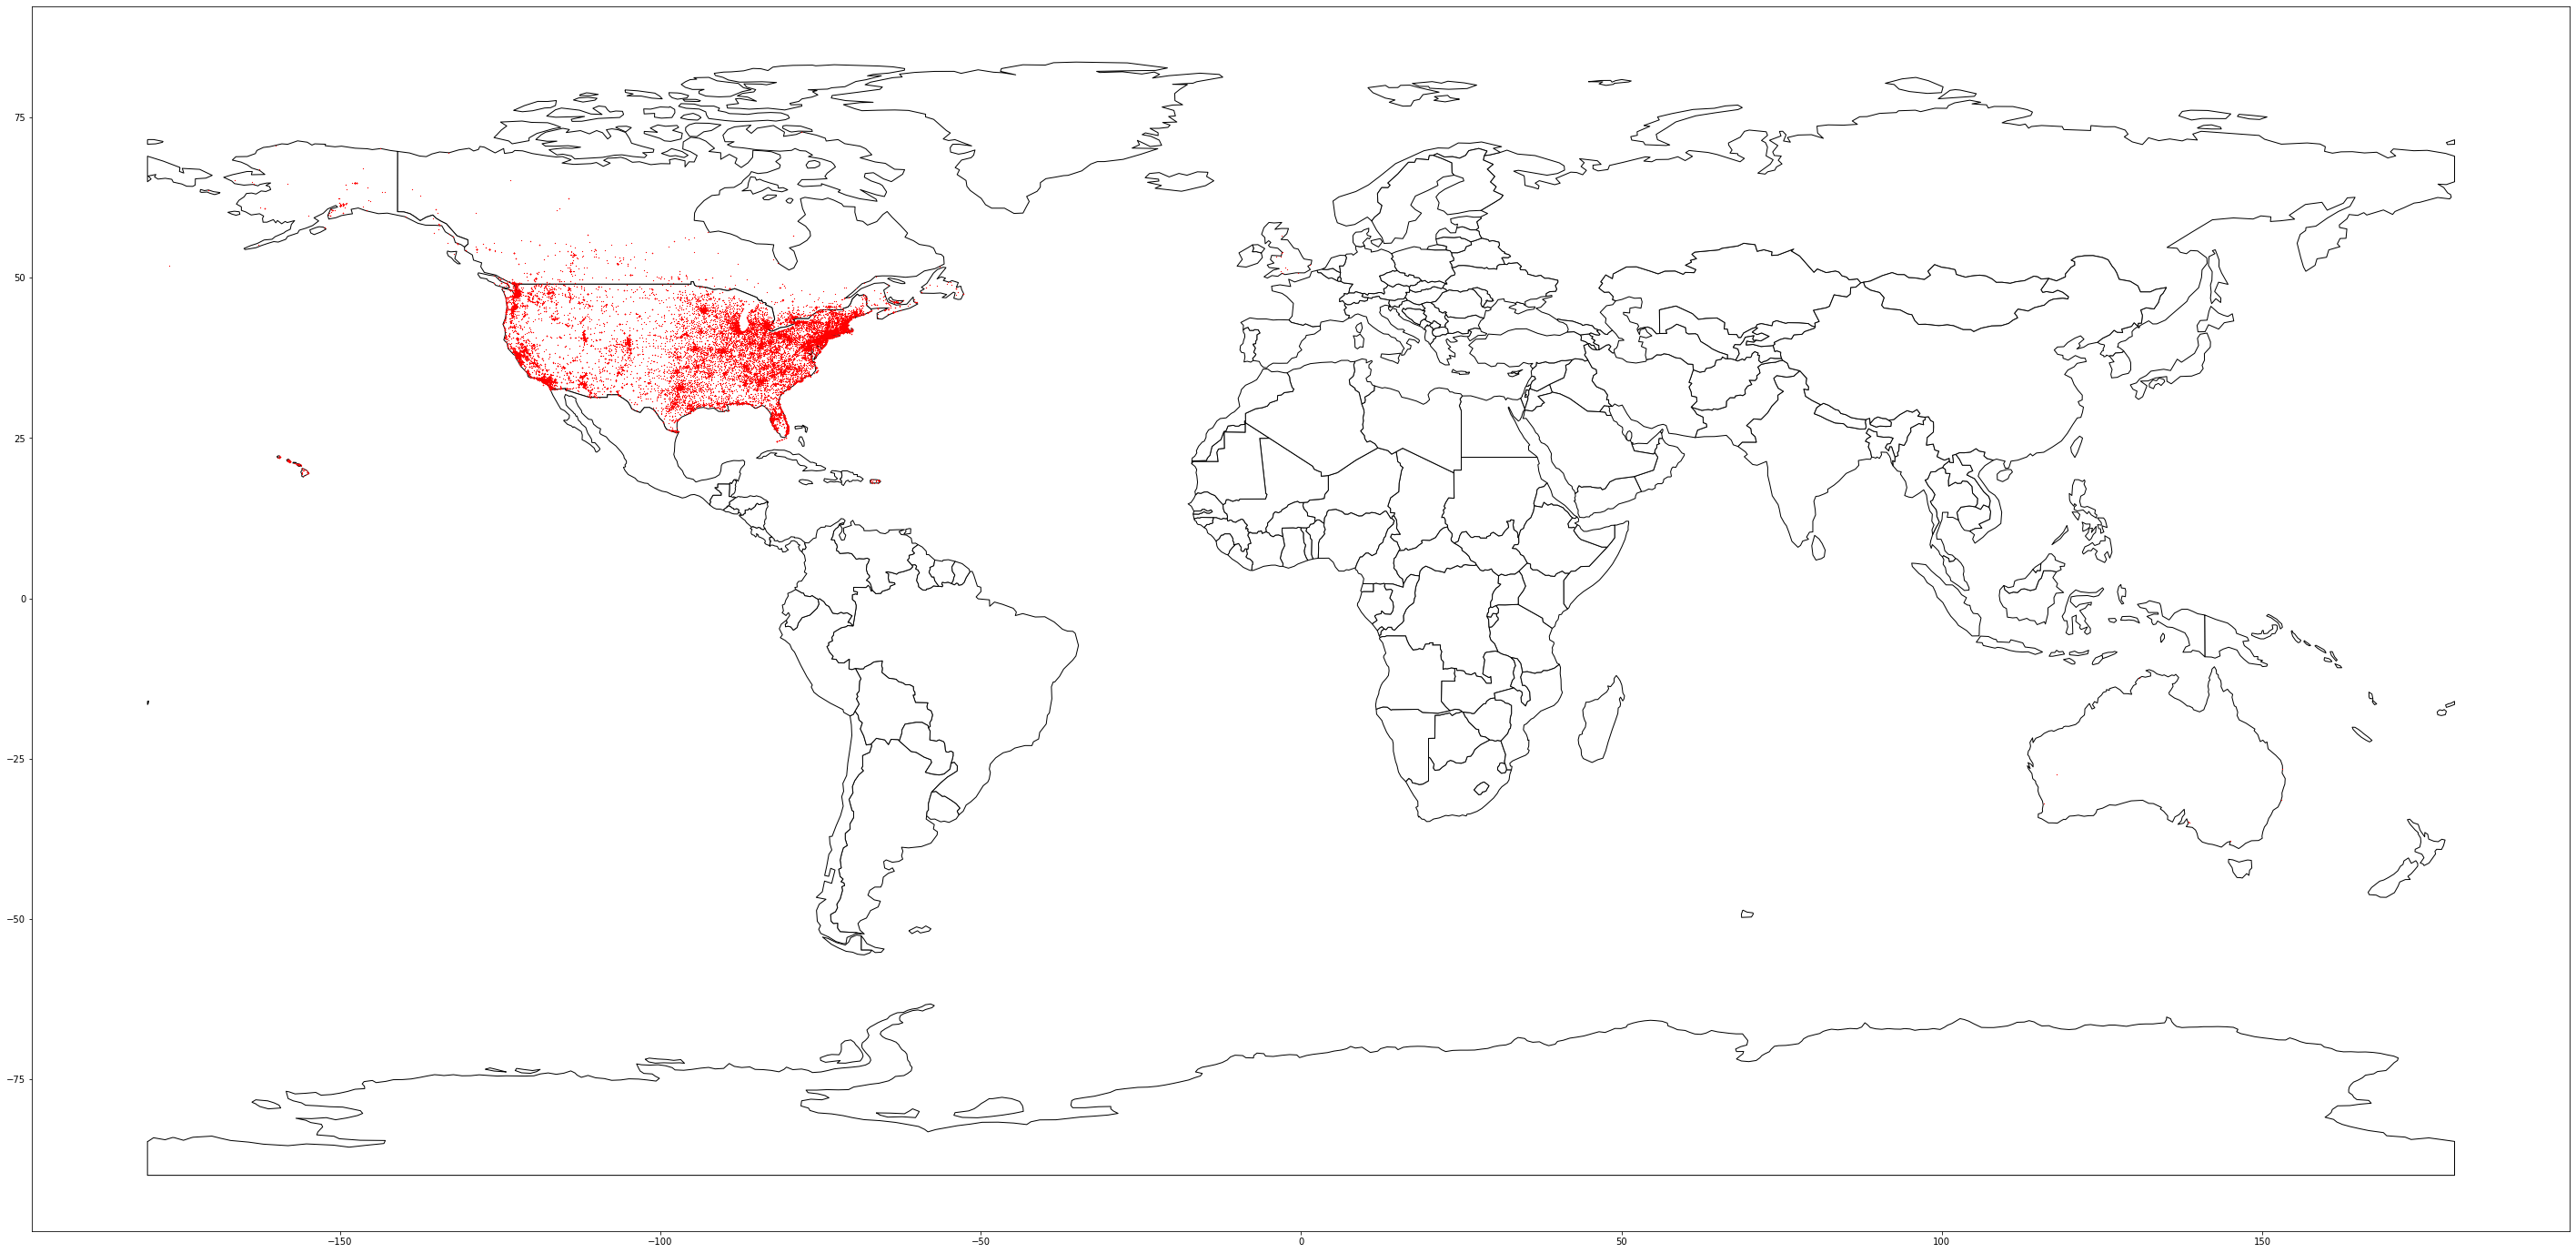

In [326]:
gdf = geopandas.GeoDataFrame(
    default_coordinates_information, geometry=geopandas.points_from_xy(default_ufo_information.longitude, default_ufo_information.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')

gdf.plot(ax=base, marker='*', color='red', markersize=0.1);


# Vragen <a class="anchor" id="vragen"></a>